<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quadrature amplitude modulation**
- **Solving the problem with the carrier of AM**:

  AM with suppressed carrier: $s(t)⋅sin(ω_T⋅t)$

  → Receiver must internally regenerate carriers for demodulation

  → Receiver becomes more complex

- **Band width efficiency**:

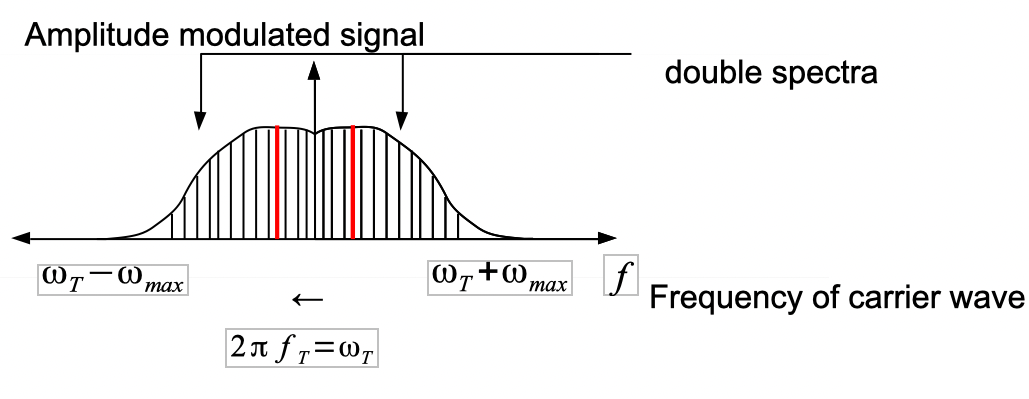

**Idea/approach**: use of full bandwidth of both sidebands for our signal of interest, without duplication

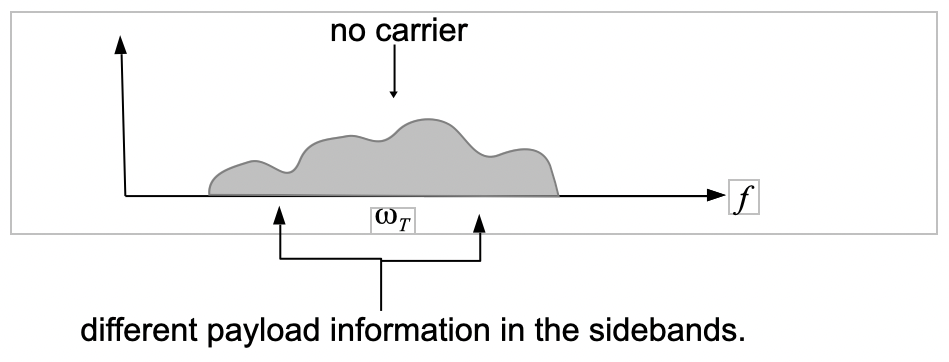


#**How do we achieve full bandwidth utilization?**

Pointer diagram for illustration (with $e^{jw_T⋅t}=cos(w_T⋅t)+j⋅sin(w_T⋅t)$
 ):

The sine function is the imaginary part of this complex exponential:

$s(t)⋅sin(w_T⋅t)=ℑ(d(t)⋅e^{jw_T⋅t}$

↓

real-valued

###$S(t)⋅e^{jw_T⋅t}$ :


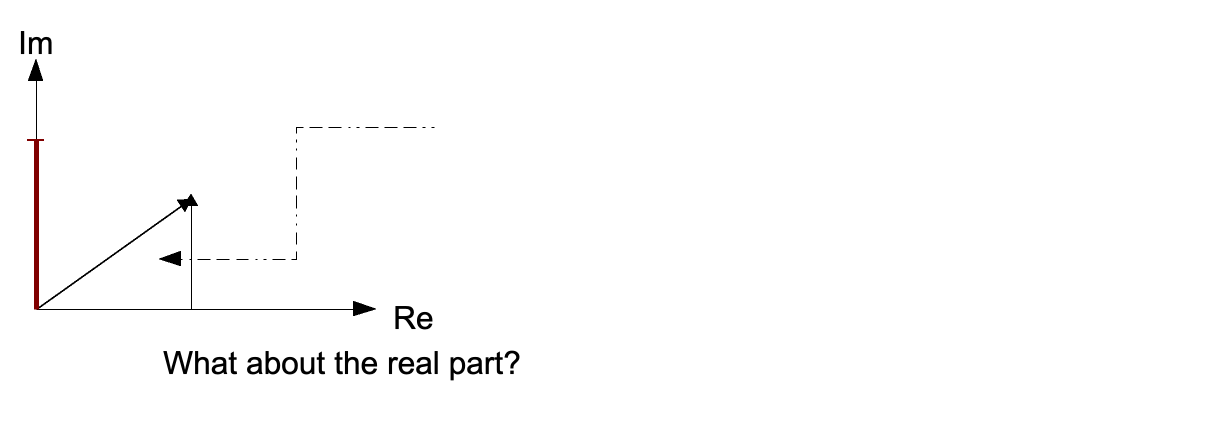

**Observe**: The real part could also be used for signal transmission.

In AM, the real and imaginary parts provide the same information, hence it has symmetric sidebands.

But: We can also use the real and imaginary parts to transmit separate information. These are separate, because the imaginary and the real part are "perpendicular" to each other.

→ **Quadrature Amplitude Modulation (QAM)**

→ 	we take two different  signals, ( $s_1(t)$ and $s_2(t)$ ) and 	modulate them on a sine and cosine carrier,

$$QAM=s_1(t)⋅sin(w_T⋅t)+s_2(t)⋅cos(w_T⋅t)$$


- **Demodulation**: Projection onto one of the two axes (real or imaginary part)
- Projection is analogous to vector multiplication
      
    → Multiplication with one vector (scalar multiplication) corresponds to the projection onto this vector

- „Vector" of the imaginary axis corresponds to the $sin(w_T⋅t)$
- „Vector" of the real axis corresponds to $cos(w_T⋅t)$

#**Python Example:**
We generate sine and cosine waves for the encoders (transmitters) and decoders (receivers):

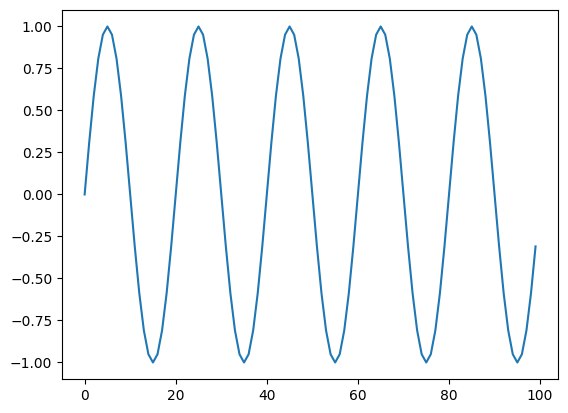

In [2]:
import numpy as np
import matplotlib.pylab as plt

shfenc=np.sin(np.pi*10*np.arange(1,2,0.01)); #Encoder Sine wave
plt.plot(shfenc);

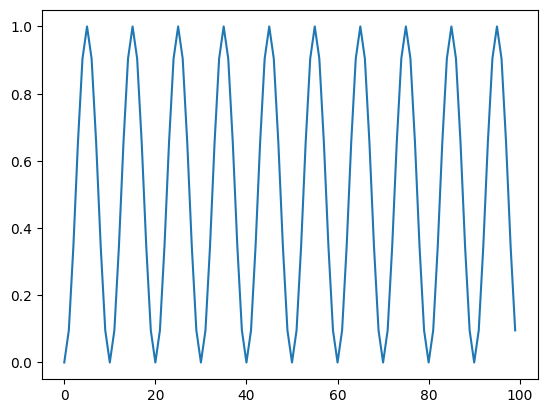

In [3]:
shfdec=shfenc; #Decoder Sine wave
chfenc=np.cos(np.pi*10*np.arange(1,2,0.01)); #Encoder Cosine Wave
chfdec=chfenc; #Decoder Cosine Wave
plt.plot(shfenc*shfdec) #Encoder and Decoder Sine Waves in Decoder multiplied by one another

We see: At the receiver we get an oscillation with double frequency, and a constant mean value (obtained by low pass filtering) of 0.5, with which we can reconstruct the transmitted signal. This is the multiplication of the sine wave with itself. Therefore, we obtain the sum frequency as the double sine frequency, and the difference frequency of 0, the constant mean value. 

**Note**: We can thus also transmit negative signal values s(t)

Now we test what happens when we multiply the sine carrier with the cosine function in the decoder:
 

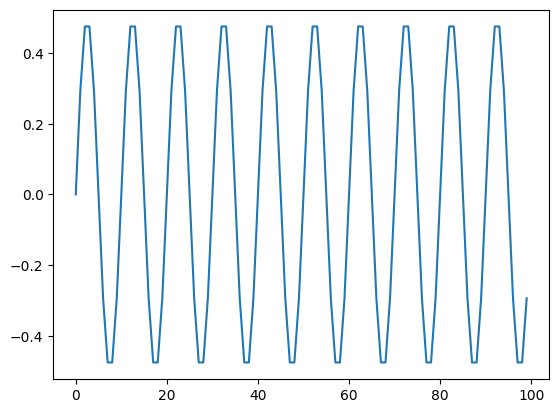

In [4]:
plt.plot(shfenc*chfdec) #Multipying Enc Sine with Dec Cosine Wave

We see: In the receiver we get the sum frequency again, which we can remove by low-pass filtering, but now we get a constant mean value of 0 (which is the result after the low-pass filtering), independent of the amplitude of the encoder sine wave. Therefore, the sine wave of the encoder has no disturbing influence on the cosine decoding.
The same applies to cosine modulation in the encoder and sine demodulation in the decoder.
This allows us to separate the sine and cosine components in the decoder.


**Hence the receiver computes from the received QAM signal:**

$$s_1(t)=LP(QAM⋅sin(w_T⋅t))$$


Low-pass filter to suppress frequencies in the carrier frequency range (as with AM)

$$s_2(t)=LP(QAM⋅cos(w_T⋅t))$$

→ i. e. with the QAM we have indeed accommodated twice as much payload signal bandwidth at the same high frequency bandwidth as the AM.

**We see**: Instead of **2 carriers** of different frequencies we can use one **sine** and one **cosine** carrier on the **same frequency!**

**Note**: each part of the QAM (Sin or Cos) is an AM without carrier, only with 90° phase offset between its original carriers.

→each part has 2 symmetrical sidebands

→ after the addition of the components, different sidebands result



The follwoing picture shows an example spectrum of a QAM signal.

Amplitude vs. Frequency:

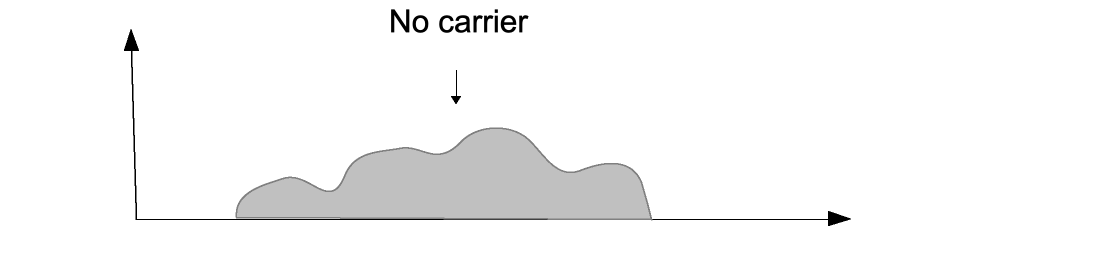

→ shows that the whole spectrum of the channel is used for different information and that no duplication takes place.

→ No carrier

→ Carrier regeneration required

QAM is used in analog TV for color information. 

Components $s_1(t)$ and $s_2(t)$ are the color components, $U$ and $V$ in the PAL Standard, or $I$ and $Q$ in NTSC Standard. 
(SECAM uses FM, one line for $V$ , the next for $U$ ).

**Carrier regeneration**: Short bursts of the carrier are sent in the horizontal blanking interval, to which an internal oscillator is synchronized, to the correct frequency and phase (color carrier at 4.43 MHz).

→ The carrier only needs to be present for a short period of time.

Example: Time plot for 2 lines of a PAL video signal:

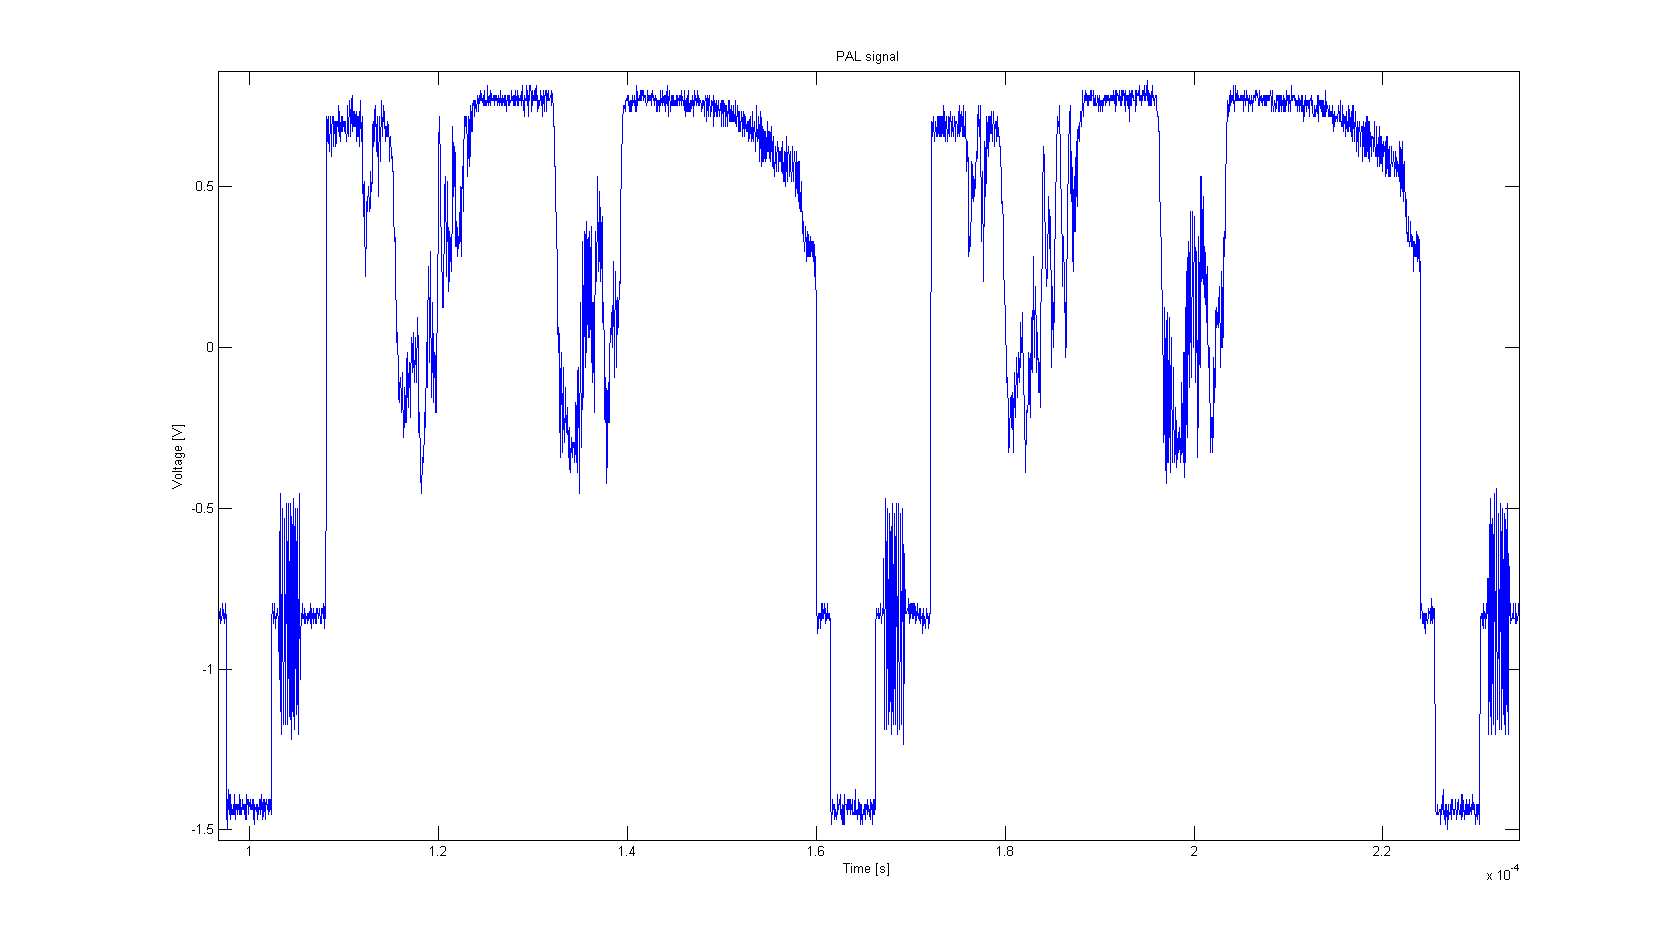

The bursts of the color carrier between the line information, in the horizontal blanking interval, are seen.

(From: http://en.wikipedia.org/wiki/PAL#Colour_encoding)

QAM is also used in **digital television** to transmit digital data.

Illustration of data modulation:

1 cross is transmitted per time slot, 1 fixed bit combination per cross.


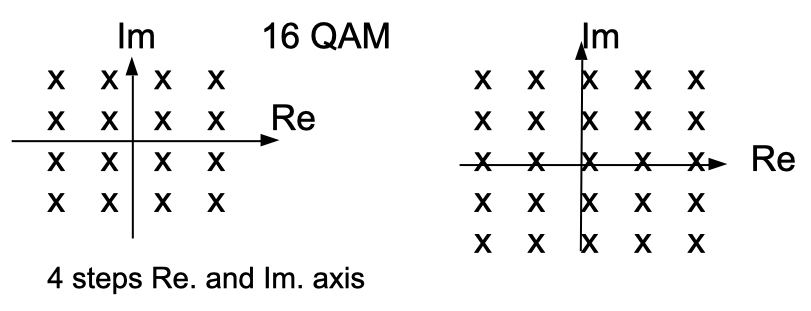

Each cross symbolizes a data word: Constellation e. g. with 16 data words → 4 bit/Data word → Data word is also called symbol.

The number of symbols (crosses) depends on how interference-proof the transmission channel is. Fewer symbols→ more immunity to interference.
One symbol (one "cross") is transferred per time step.
The bits (the bit combination) indicate which "cross".

Related to the QAM is the so-called amplitude and phase modulation, **APSK**. The difference is that the constellations lie on concentric circles, which results in a few discrete amplitudes (distances from the origin).

#**Application examples:**
- **Digital Video Broadcast** (DVB):

  Terrestrial (receivable with rod antenna, DVB-T) used: 
QPSK (Quadrature Phase Shift Keying= 4-QAM), 16-QAM, 64-QAM
(From: https://de.wikipedia.org/wiki/Digital_Video_Broadcasting)
The numbers indicate the number of QAM symbols. 

- **Mobile radio**:

  The QAM principle is also used in mobile radio for voice and data transmission (e. g."Digital signal transmission in mobile radio", by H. Nuszkowski, p. 72).


#**Other modulation modes:**
##**Single sideband modulation(SSB)**




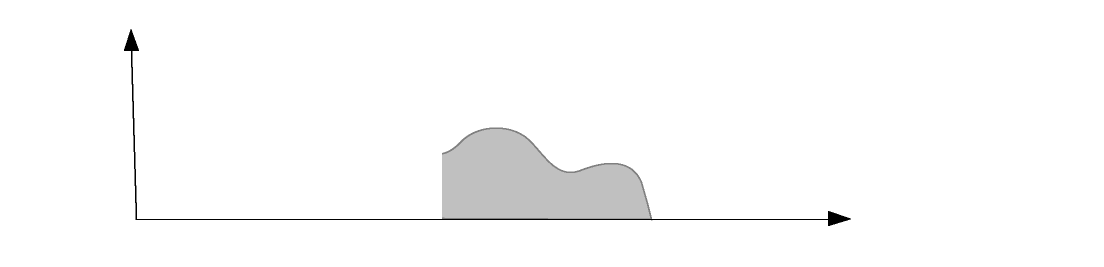

only one sideband

→ Carrier and other sideband were filtered out

**Problem with video signals**:

Due to finite steepnes of the filter, the DC, i.e. the constant parts of the image (brightness of surfaces) will also be filtered out, i. e. only edges would remain.

    • No problem for voice/audio, because DC doesn't play a role there (cannot be heard)

→  is used for voice transmission.

    • DC is also important for the color components, QAM can transmit DC.


#**Frequency Modulation (FM)**

e. g. used for the sound in analog TV, for SECAM additionally for the color components.

Peak frequency deviation Δ

$$FM=sin((w_T+Δ⋅s(t))⋅t)$$

signal s(t) modulates the carrier frequency 

- Interference is usually noticeable in amplitude and less in frequency.

→ more robust against interference

→ Bandwidth about: 2*(Signal bandwidth + Peak frequency deviation)
→ very poor bandwidth efficiency (worse than AM)

→ Noise immunity is bought by poorer bandwidth efficiency

- Invented by Armstrong in the 1930s in New Jersey

- is mainly used on higher frequencies, such as VHF or UHF

#**Phase-Modulation (PM)**

Here, the payload signal is transmitted via the phase of the carrier and is related to FM:

$$PW=sin(w_T⋅t+Δ⋅s(t))$$

UHF channel spacing supplement:
- North America, Japan: 6 MHz
- Australia: 7 MHz
- Europe: 8 MHz

→ Also see: wikipedia.org – Television channel frequencies

 

#**Phase error during decoding of the QAM:**
Decoding: Projection no longer on the original real and imaginary axis, but on a slightly rotated axis or a correspondingly phase shifted carrier



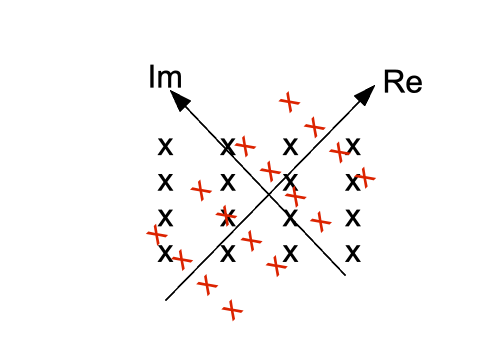

-	Rotation of the crosses due to phase                                								error in the decoder
			→ Wrong representation of received 										values
			→ Bit errors

#**Colour transmission in analog TV**

v' Receiver

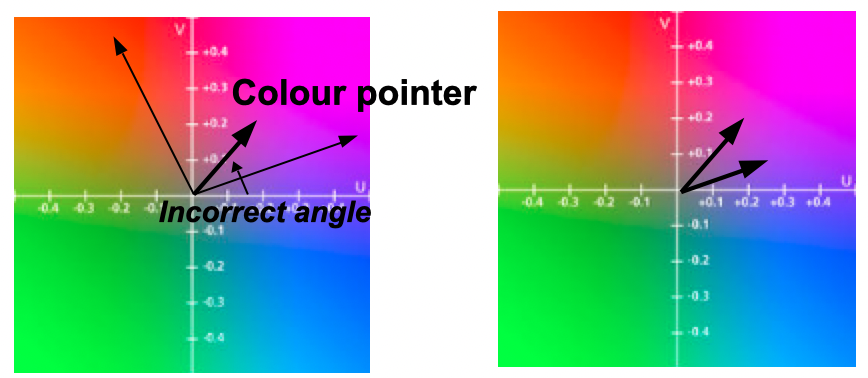

→ distorted color value

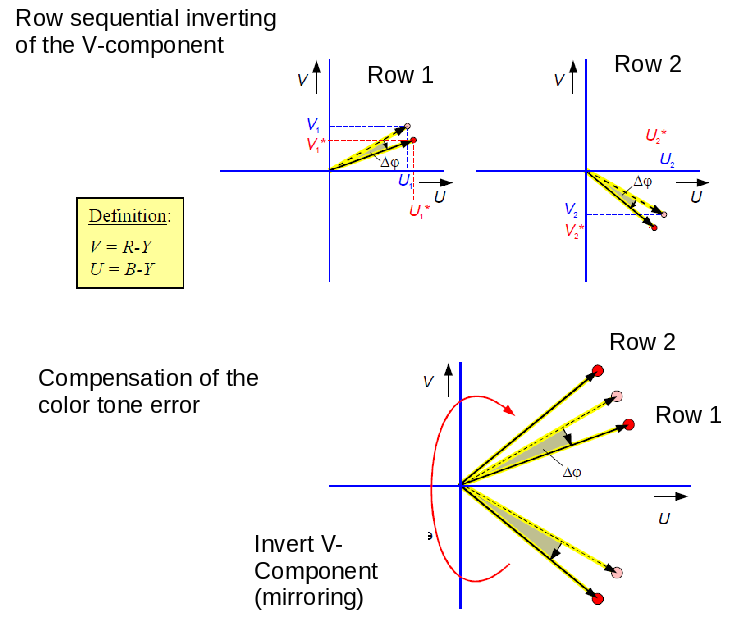

Prof. Dr.-Ing. W.-P. Buchwald, „Farbcodierung- Kapitel 3“, 2010, url: http://public.rz.fh-wolfenbuettel.de/~buchwald/vl/gv/

→ i. e. phase error in the QAM leads to phase errors in the color space, in the color type.

- Was problem with NTSC (now solved with reference line with face color).

- PAL solves this problem by transmitting one of the chrominance values  alternately with positive and negative angles (change is from line to line).
      
- The mean value is calculated over 2 lines each.

	→ This means that phase error no longer leads to phase errors in the color type (angle errors cancel each other out), but to errors in the length of the pointer, i. e. the color saturation.	

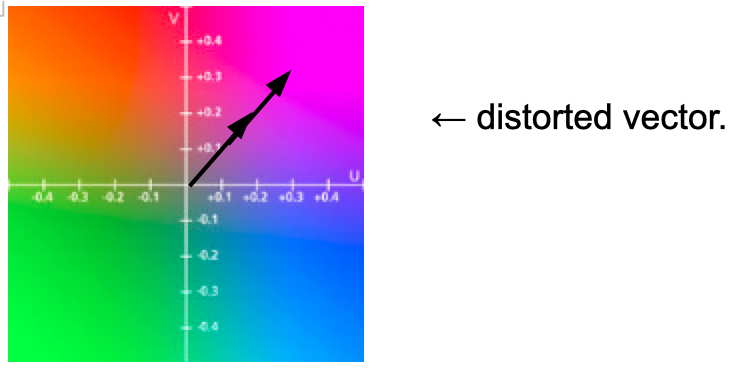

**Advantage**: Color saturation error is less noticeable

**Example**: 	Green complexion is more noticable compared to pale skin tone.

#**SECAM**
For transmiting colour information with FM, U-component and V-component are send in alternating lines 

→ 	no phase error problems

- **Advantage FM**: Relatively resistant to interference and good signal level
- **Disadvantage FM**: Either large bandwidth (problem when nesting it into the luminance signal) or low peak frequency deviation, which results in lower noise immunity.

→ 	If the signal level is low, strong distortions in the color signal 	can occur quickly.

→ E. g. bright orange colour edges at video objects on weak reception

→ PAL behaves better with poor reception.


